In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df_dia = sns.load_dataset("diamonds")
df_dia.columns # check the columns in the dataset
df_dia.head(100) # sample, tail - to overview dataset 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
95,0.70,Good,E,VS2,57.5,58.0,2759,5.85,5.90,3.38
96,0.70,Good,F,VS1,59.4,62.0,2759,5.71,5.76,3.40
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
98,0.73,Very Good,E,SI1,61.6,59.0,2760,5.77,5.78,3.56


The average price of all diamonds in this dataset is: 3932.8


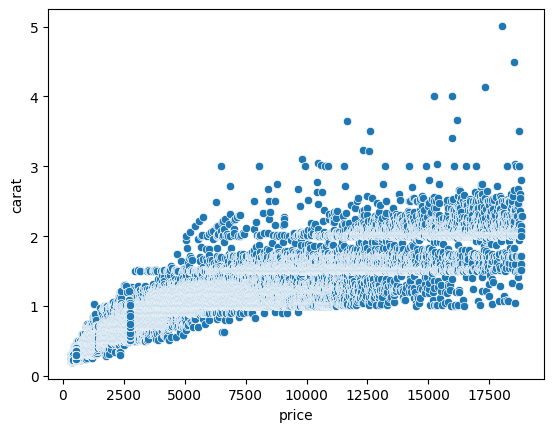

In [55]:
# 1. Яке середнє значення ціни всіх алмазів у датасеті? - зберегти в змінну avg_df та округлити до другого значення 
sns.scatterplot(x='price', y='carat', data=df_dia)

avg_price=df_dia['price'].mean()
print(f'The average price of all diamonds in this dataset is: {round(avg_price,2)}')  # чомусь повертається лише один знак після коми
# Scatter plot для визначення ненормальних точок, але як показав графік, суттєвих викидів немає. 

In [59]:
# 2. Яка середня кількість каратів у алмазів кожної якості огранювання?
avg_carat=df_dia.groupby('cut')['carat'].mean()
print(avg_carat)

cut
Ideal        0.702837
Premium      0.891955
Very Good    0.806381
Good         0.849185
Fair         1.046137
Name: carat, dtype: float64


C:\Users\Марина\AppData\Local\Temp\ipykernel_1616\3339075104.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_carat=df_dia.groupby('cut')['carat'].mean()


In [7]:
# 3. Який колір алмазу найпоширеніший у датасеті?
colors=df_dia['color'].unique() #виводимо всі наявні кольори в датасеті
print(colors)

most_freq_color=df_dia['color'].value_counts().idxmax() # виводимо значення яке зустрічається найчастіше
print(f'\n"{most_freq_color}" is the most frequent diamond color')

round(df_dia['color'].value_counts(normalize= True) * 100, 2) # перевірка правильності результату

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

"G" is the most frequent diamond color


color
G    20.93
E    18.16
F    17.69
H    15.39
D    12.56
I    10.05
J     5.21
Name: proportion, dtype: float64

C:\Users\Марина\AppData\Local\Temp\ipykernel_1616\720180539.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color', y=color_counts.values, data=color_counts.reset_index(),


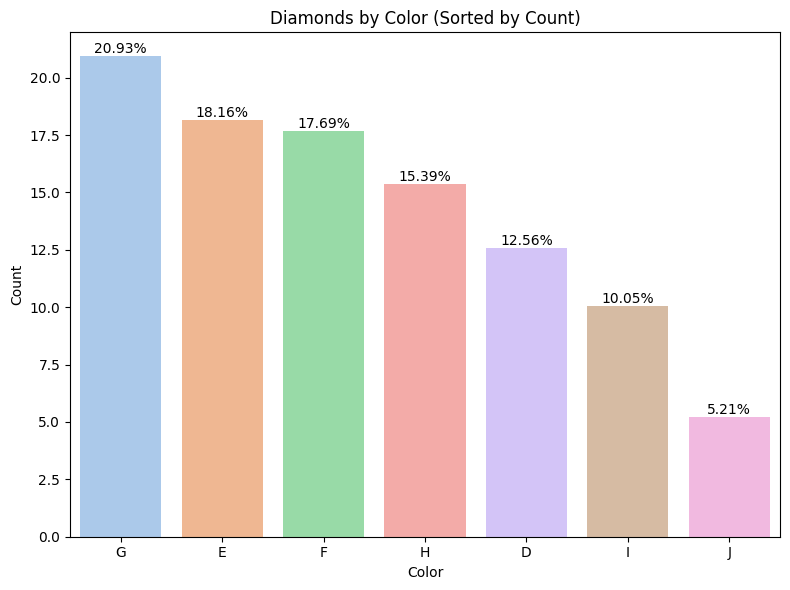

In [8]:
#4. Який розподіл кількості алмазів за кожним кольором? Використе графік для пояснення
color_counts = round(df_dia['color'].value_counts(normalize=True)*100,2)
sorted_colors = color_counts.index.tolist() # сортую, щоб в гістограмі дані відображлись від більшого до меншого, а не по алф назві кольорів
plt.figure(figsize=(8, 6))

sns.barplot(x='color', y=color_counts.values, data=color_counts.reset_index(),
            order=sorted_colors, palette='pastel')
for i, count in enumerate(color_counts): # додала анотацію до колонок в гістограмі
    plt.annotate(f"{count}%", xy=(i, count), ha='center', va='bottom', fontsize=10)

plt.title('Diamonds by Color (Sorted by Count)')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# short review: найбільше діамантів зустрічається саме в кольорі G, їх відношення у відсотках до загальної кількості діамантів дорівнює 20,93%, 
# тоді як найменша кількість діамантів кольору J, їх відсоткове відношення дорівнює 5,21%. 

In [61]:
#5. Який відсоток алмазів у датасеті має якість ограновування "Fair"?  Округлити до другого значення
#quant_count=df_dia['cut'].value_counts() # general quantity of diamonds in each cut

perc_count=round(df_dia['cut'].value_counts(normalize= True) * 100, 2) # percentage quantity of diamonds in each cut
#print(f'{quant_count} \n\n{perc_count}')

perc_fair_cut = perc_count['Fair']

print(f"The percentage of 'Fair' cut diamonds is: {perc_fair_cut}%")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

cut
Ideal        39.95
Premium      25.57
Very Good    22.40
Good          9.10
Fair          2.98
Name: proportion, dtype: float64
The percentage of 'Fair' cut diamonds is: 2.98%


In [10]:
#6. Який відсоток алмазів у датасеті є ідеально огранованими?
perc_ideal_cut = perc_count['Ideal']

print(f"The percentage of 'Ideal' cut diamonds is: {perc_ideal_cut}%")

The percentage of 'Ideal' cut diamonds is: 39.95%


In [63]:
#7. Яка середня кількість алмазів знаходиться в категорії "Premium" у кожному кольорі?
premium_quant= df_dia[df_dia['cut'] == 'Premium']['color'].value_counts()
print(f'The quantity of diamonds in "Premium" cut is : \n{premium_quant}')

The quantity of diamonds in "Premium" cut is : 
color
G    2924
H    2360
E    2337
F    2331
D    1603
I    1428
J     808
Name: count, dtype: int64


In [14]:
#8 для себе: вивести статистику ціни (мін, макс, сер) для діамантів, розподілених по якості та кольору.

df_dia.groupby([ # e.g. grouping by several columns and several conditions
    'cut', 'color'
]).agg({
    'price': [('mean', lambda x: round(x.mean(), 2)), 'min', 'max']

})

C:\Users\Марина\AppData\Local\Temp\ipykernel_1616\3596159125.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dia.groupby([ # e.g. grouping by several columns and several conditions


price            
                    mean  min    max
cut       color                     
Ideal     D      2629.09  367  18693
          E      2597.55  326  18729
          F      3374.94  408  18780
          G      3720.71  361  18806
          H      3889.33  357  18760
          I      4451.97  348  18779
          J      4918.19  340  18508
Premium   D      3631.29  367  18575
          E      3538.91  326  18477
          F      4324.89  342  18791
          G      4500.74  382  18741
          H      5216.71  368  18795
          I      5946.18  334  18823
          J      6294.59  363  18710
Very Good D      3470.47  357  18542
          E      3214.65  352  18731
          F      3778.82  357  18777
          G      3872.75  354  18818
          H      4535.39  337  18803
          I      5255.88  336  18500
          J      5103.51  336  18430
Good      D      3405.38  361  18468
          E      3423.64  327  18236
          F      3495.75  357  18686
          G      4123.48  394  18788
          H      4276.25  368  18640
          I      5078.53  351  18707
          J      4574.17  335  18325
Fair      D      4291.06  536  16386
          E      3682.31  337  15584
          F      3827.00  496  17995
          G      4239.25  369  18574
          H      5135.68  659  18565
          I      4685.45  735  18242
          J      4975.66  416  18531

In [15]:
# 9. find the average price for diamonds in color H and clarity SI1
aver_price = df_dia[(df_dia['clarity'] == 'SI1') & (df_dia['color'] == 'H')]['price'].mean()
print(f"The average price for diamonds in H color and with SI1 clarity is: {aver_price:.2f}")


The average price for diamonds in H color and with SI1 clarity is: 5032.41


In [34]:
df_dia['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [74]:
# 10. Write a function to display diamonds due user defined conditions
def get_diamond_info(carat_value, cut_input, df_dia):
    diamond_info = df_dia[(df_dia['carat'] == carat_value) & (df_dia['cut'] == cut_input)]
    
    if not diamond_info.empty:
        return diamond_info
    else:
        return "No information found for the specified carat value and cut."

carat_value = float(input("Enter a carat value from 0.01 to 5.50: ").replace(',', '.')) # на випадок, якщо юзер переплутає кому з крапкою.
cut_input = input('Choose your cut: (Premium, Ideal, Fair, Good, Very Good)').capitalize() # щоб завжди виводило велику заглавну літеру. Не працює з Very Good, тут треба самому слідкувати, або придумати інший спосіб

result = get_diamond_info(carat_value, cut_input, df_dia)
print(result)

       carat      cut color clarity  depth  table  price     x     y     z
19339   3.01  Premium     I      I1   62.7   58.0   8040  9.10  8.97  5.67
21862   3.01  Premium     F      I1   62.2   56.0   9925  9.24  9.13  5.73
25460   3.01  Premium     G     SI2   59.8   58.0  14220  9.44  9.37  5.62
27514   3.01  Premium     I     SI2   60.2   59.0  18242  9.36  9.31  5.62
27684   3.01  Premium     J     SI2   60.7   59.0  18710  9.35  9.22  5.64
27685   3.01  Premium     J     SI2   59.7   58.0  18710  9.41  9.32  5.59
